# Import libraries 

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# Read dataset and handle missing values

In [5]:
df_1=pd.read_csv("data.csv")
print(df_1.head())
## replace latin space (u'\xa0') with a space (u' ') 
df_1.columns= df_1.columns.str.replace(u'\xa0', u' ',regex=True)
##replace all latin space in the dataset with a space
df_1=df_1.replace(u'\xa0', u' ',regex=True)
print("new names:",df_1.columns) 
## drop the last column
df_1 = df_1.iloc[: , :-1]
##count number of missing in the dataset
print("number of missing at each attribute:")
print(df_1.isnull().sum())
## number of rows before removing the missing entries
print("number of rows before removing missing entries:", df_1.shape[0])
## remove missing entries 
df=df_1.dropna()
## number of rows after removing the missing entries
print("number of rows after removing missing entries:", df.shape[0])

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Dropping Unnecessary Columns

In [6]:
df=df.drop(['id', 'radius_mean', 'radius_se', 'radius_worst'], axis=1)
print(df.columns)

Index(['diagnosis', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


# Preprocessing

In [7]:
df.dtypes
## scale features 
scaler = StandardScaler()
df.iloc[:, 1:]= scaler.fit_transform(df.iloc[:, 1:])
# df.head
## encode diagnosis 
encoder= LabelEncoder()
df['diagnosis']=encoder.fit_transform(df['diagnosis'])
print("df['diagnosis']=",df['diagnosis'])
##no nan values in dataset
print("Is there a nan values in dataset:",df.isnull().values.any())

df['diagnosis']= 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32
Is there a nan values in dataset: False


In [9]:
# save data in csv 
df.to_csv("data_refined.csv", index=False)

# visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA6BDCA390>,
      dtype=object)

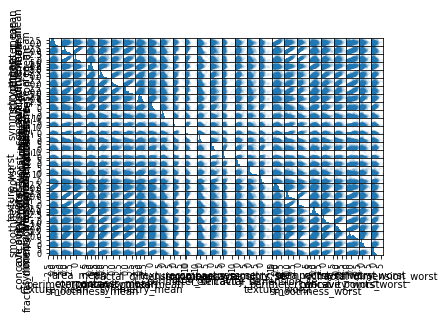

In [38]:
# pair plots
pd.plotting.scatter_matrix(df.iloc[:, 1:],alpha=0.1)

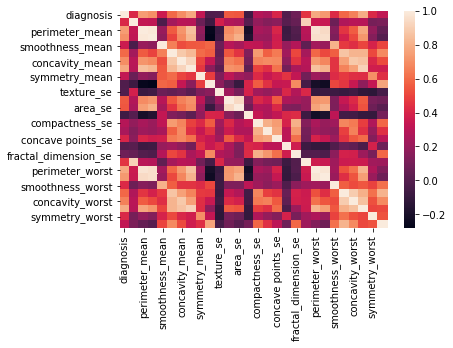

In [41]:
# correlation matrix heatmap 
sns.heatmap(df.corr())

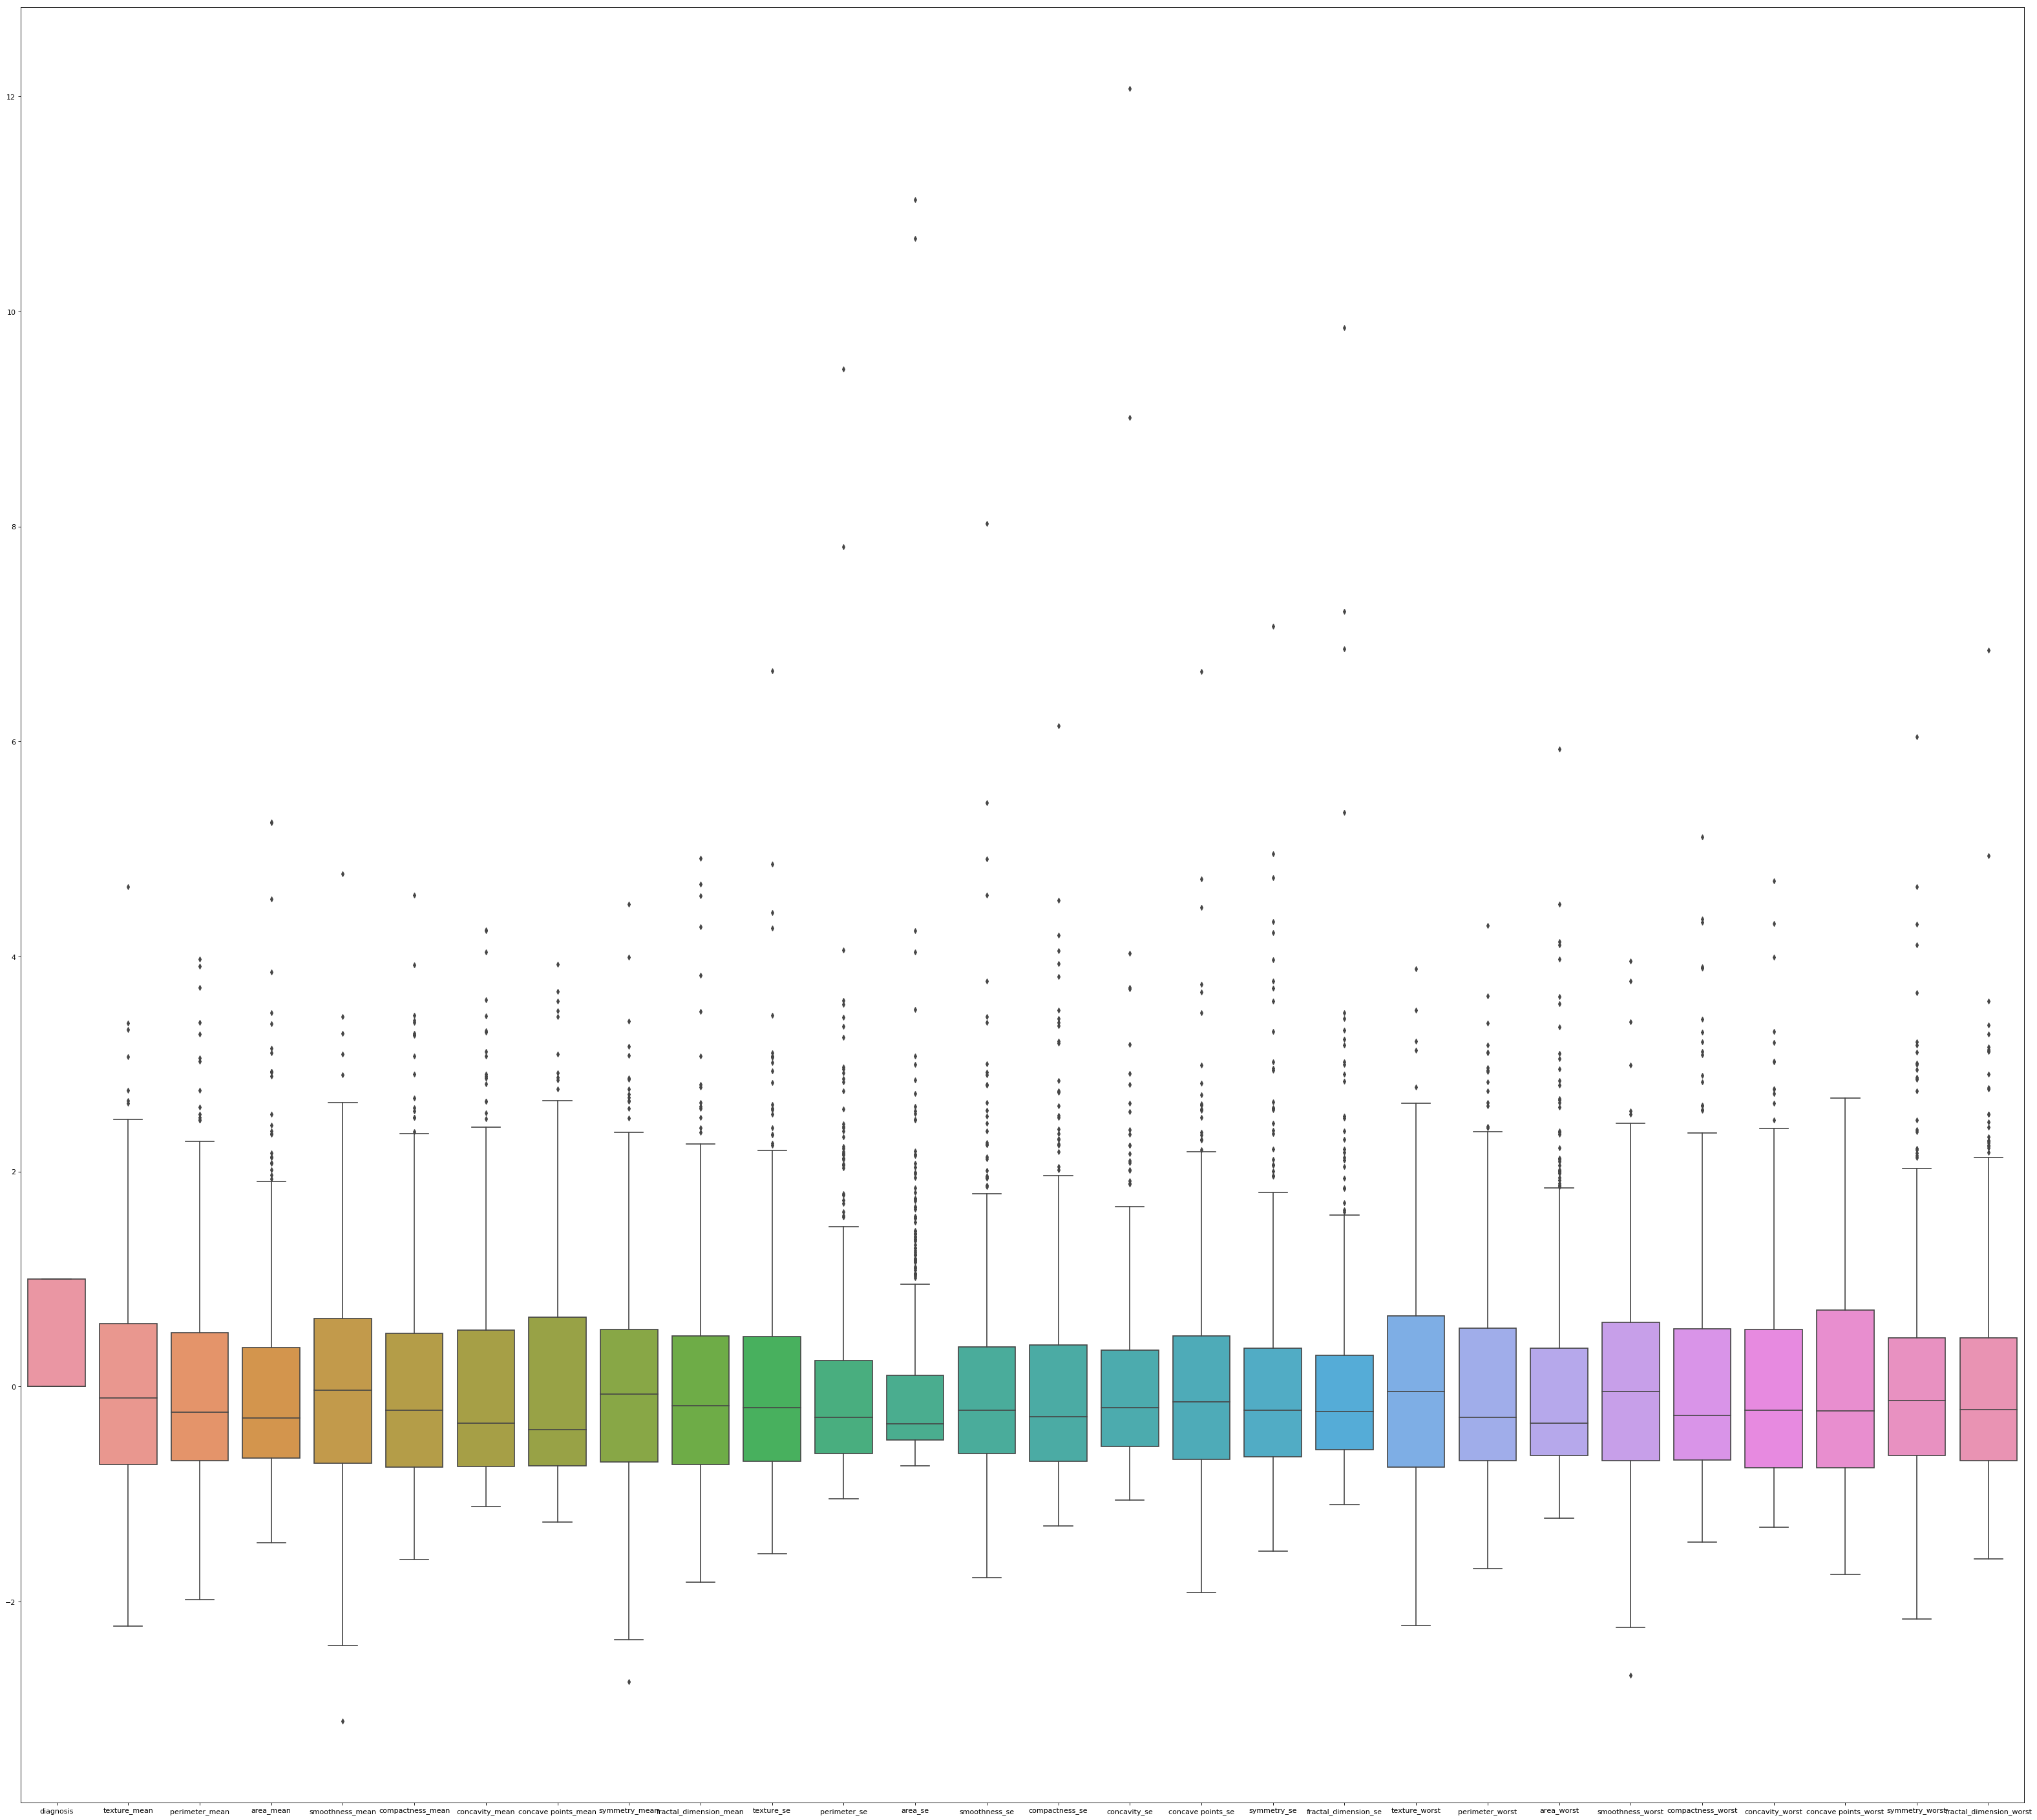

In [52]:
# Box plots for the features
figure(figsize=(50, 46), dpi=80)
sns.boxplot(data= df)

# Challenge Yourself

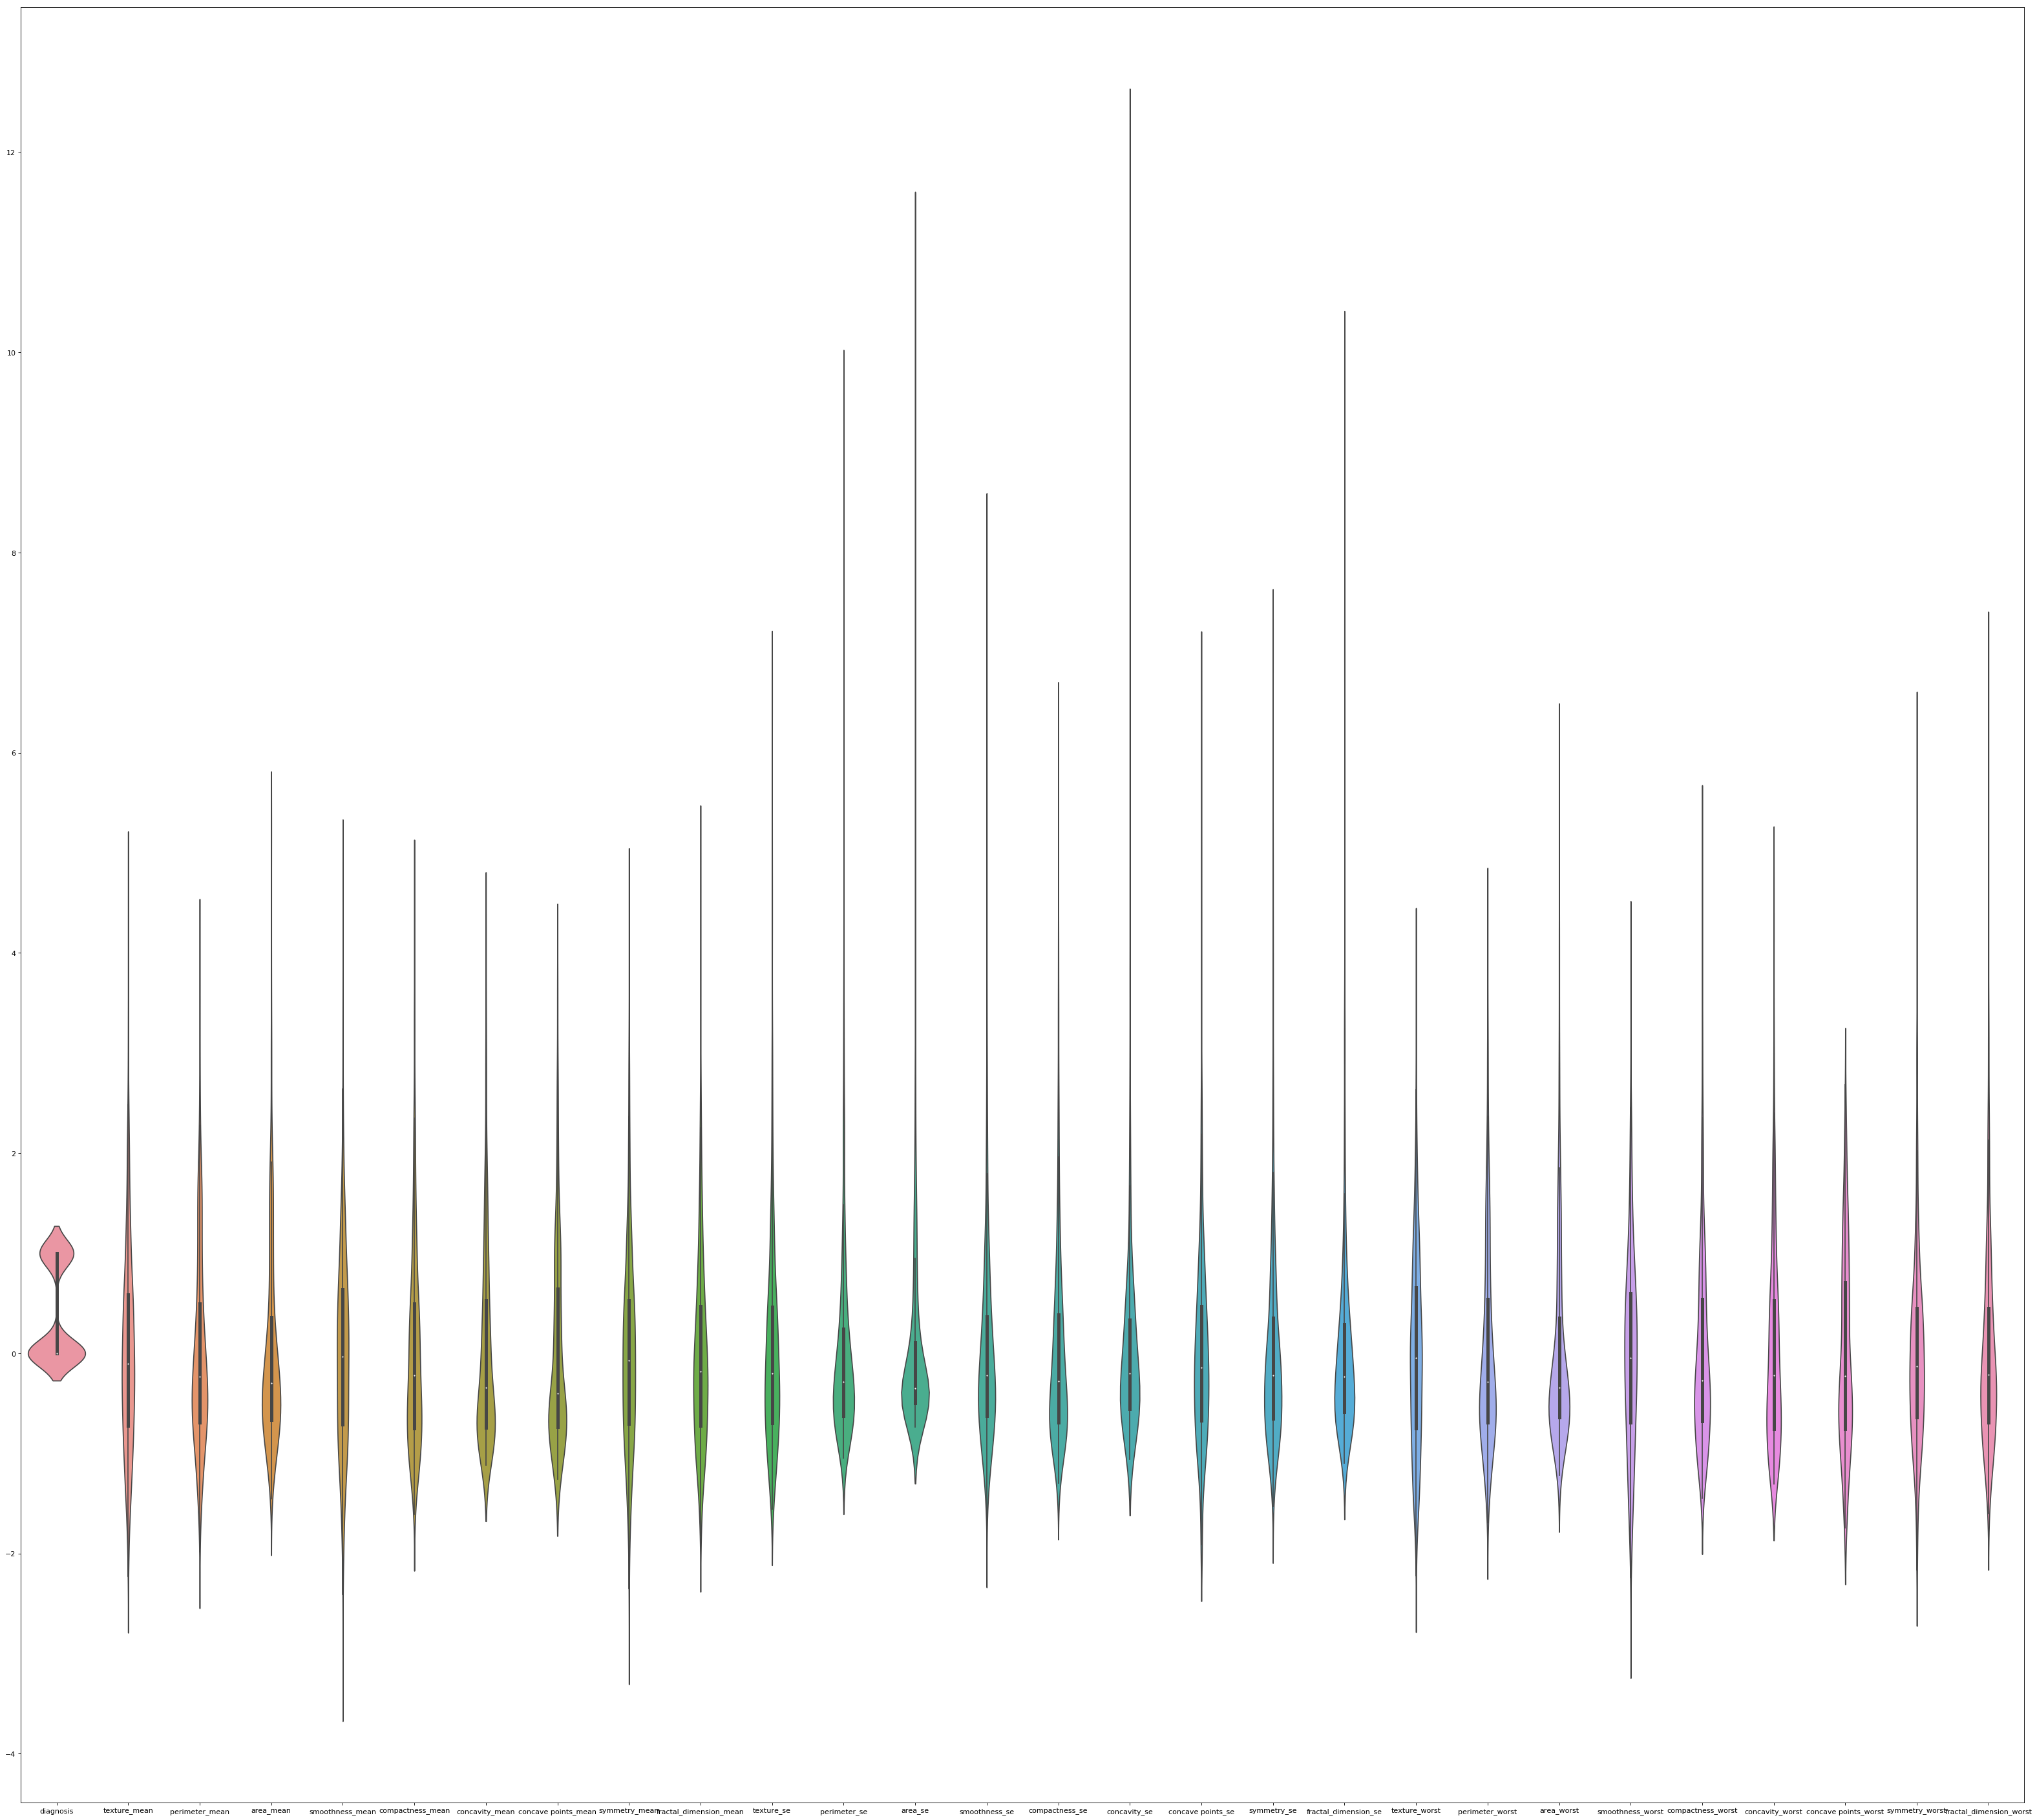

In [54]:
# visualized data into violin 
figure(figsize=(50, 46), dpi=80)
sns.violinplot(data= df)

# Comment
From violin plot, one can see that there are multiple features have outliers